In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit
import seaborn as sns


class RBFNetClassifer():

    def __init__(self , features , targets , numberOfGaussians , eta = 0.01):
        self.features = features
        self.targets = targets
        self.numberOfGaussians = numberOfGaussians
        self.eta = eta
        self.clusters , self.centers  = self.k_means()
        self.stds = self.calculate_std()
        self.bias = np.random.rand()
        self.W = np.random.rand(numberOfGaussians)
       

    def k_means(self):
        random_indices = np.random.choice(self.features.shape[0] , self.numberOfGaussians, replace=False)
        centers = self.features[random_indices]

        converged = False

        clusters = np.zeros(self.features.shape[0]).astype(int)
        while not converged:

            for i in range(self.features.shape[0]):
                min_distance = 999999
                for j in range(centers.shape[0]):
                    if min_distance >  np.linalg.norm(self.features[i] - centers[j]) : 
                        min_distance =  np.linalg.norm(self.features[i] - centers[j])
                        clusters[i] = j
            centers_copy = centers.copy()
            for i in range(centers.shape[0]):
                centers[i] = self.features[clusters==i].mean(axis= 0)
            
            if (centers - centers_copy).sum() < 0.00001 : 
                converged = True
            for i in range(centers.shape[0]):
                centers[i] = self.features[clusters==i].mean(axis= 0)
        return clusters , centers

    def gaussianLayer(self  , x):
      out = []
      for i in range(self.numberOfGaussians):
        d = np.linalg.norm(x - self.centers[i])
        out.append( np.exp(-((d/self.stds)**2)))
        # out.append(np.exp(-1 / (2 * self.stds**2) * (d)**2))

      return np.array(out)

        

    def calculate_std(self):
      max = -1
      for center1 in self.centers :
        for center2 in self.centers :
          if max <  np.linalg.norm(center1 - center2) : 
              max =  np.linalg.norm(center1 - center2)

      return max / ((2 * self.numberOfGaussians)**(1/2))

    def calculateOutput(self , G_layer):
      # print('self.W' ,self.W.shape , 'G_layer ' ,G_layer.shape  )
      y_net = G_layer.dot(self.W) + self.bias
      return expit(y_net)

    def training(self ,  epochs = 5):
      for ep in range(epochs):
        print("epoch : ",ep+1 , '/',epochs)
        for i in range(self.features.shape[0]):
          G_Layer = self.gaussianLayer(self.features[i])
          y_p = self.calculateOutput(G_Layer)
          # print('self.targets[i]' ,self.targets[i] )
          delta = y_p * (1 - y_p) * (self.targets[i] - y_p)
          # delta = y_p - self.targets[i]
          # print('111111111' ,self.W.shape ,' self.eta ' ,  self.eta  ,'G_Layer' ,G_Layer.shape )
          self.W = self.W + self.eta * delta * G_Layer
          # print('22222222' ,self.W.shape   )
          self.bias = self.bias + self.eta * delta * 1


    def predict(self , newData):
      return self.calculateOutput(self.gaussianLayer(newData))
                    





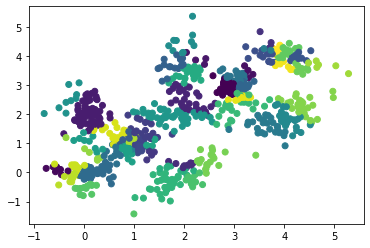

(200, 3)

In [98]:
df = pd.read_csv('Q4.csv')

from sklearn.utils import shuffle
df = shuffle(df)

data_set = np.array(df.values)

train = data_set[:800]
test = data_set[800:]

# X  = df['x'].values.reshape(-1,1)
# Y  = df['y'].values.reshape(-1,1)
# D = df['D'].values

# TT = np.hstack((X,Y))
Z = RBFNetClassifer(train[:,0:2], train[:,2].reshape(-1,1) ,50 , 0.1)

A , _ = Z.k_means()

fig, ax = plt.subplots()

ax.scatter(train[:,0], train[:,1], c=A)
plt.show()



test.shape

In [99]:
Z.training(40)

epoch :  1 / 40
epoch :  2 / 40
epoch :  3 / 40
epoch :  4 / 40
epoch :  5 / 40
epoch :  6 / 40
epoch :  7 / 40
epoch :  8 / 40
epoch :  9 / 40
epoch :  10 / 40
epoch :  11 / 40
epoch :  12 / 40
epoch :  13 / 40
epoch :  14 / 40
epoch :  15 / 40
epoch :  16 / 40
epoch :  17 / 40
epoch :  18 / 40
epoch :  19 / 40
epoch :  20 / 40
epoch :  21 / 40
epoch :  22 / 40
epoch :  23 / 40
epoch :  24 / 40
epoch :  25 / 40
epoch :  26 / 40
epoch :  27 / 40
epoch :  28 / 40
epoch :  29 / 40
epoch :  30 / 40
epoch :  31 / 40
epoch :  32 / 40
epoch :  33 / 40
epoch :  34 / 40
epoch :  35 / 40
epoch :  36 / 40
epoch :  37 / 40
epoch :  38 / 40
epoch :  39 / 40
epoch :  40 / 40


99.25 %  




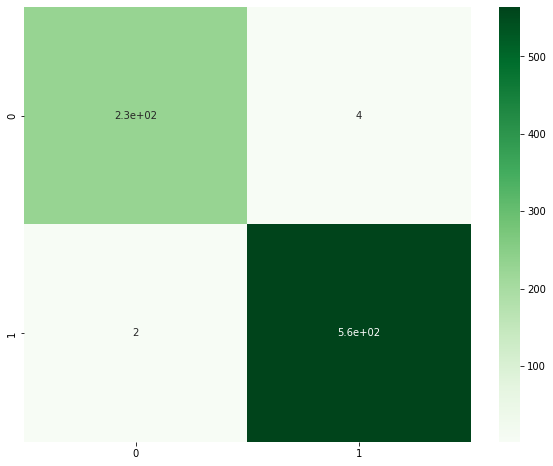

In [107]:
#--------acc on train data -------------------------
y_pred=[]
for i in range(train.shape[0]):
  n = Z.predict(train[i , 0:2])
  y_pred.append(int(n > 0.5))


from sklearn.metrics import confusion_matrix
y_true = train[: , 2]
cm = confusion_matrix(y_true, y_pred)


df_cm = pd.DataFrame(cm,['0','1'],['0','1'])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True , cmap='Greens')


true = np.diag(cm)
accuricy = np.sum(true)/np.sum(cm)
print(str(accuricy * 100)+' % ' , '\n\n')

100.0 %  




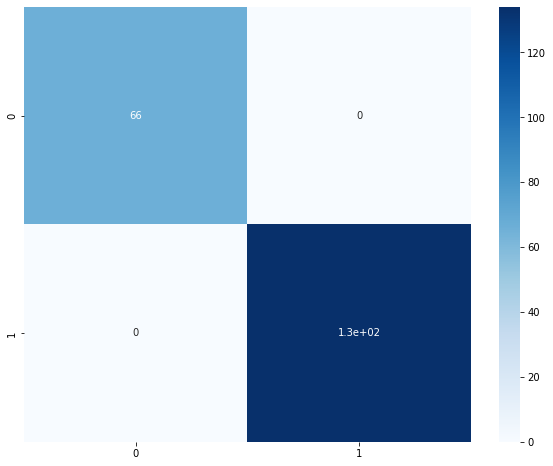

In [108]:
#--------acc on test data -------------------------
y_pred=[]
for i in range(test.shape[0]):
  n = Z.predict(test[i , 0:2])
  y_pred.append(int(n > 0.5))


from sklearn.metrics import confusion_matrix
y_true = test[: , 2]
cm = confusion_matrix(y_true, y_pred)


df_cm = pd.DataFrame(cm,['0','1'],['0','1'])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True ,cmap='Blues')


true = np.diag(cm)
accuricy = np.sum(true)/np.sum(cm)
print(str(accuricy * 100)+' % ' , '\n\n')

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit



class RBFNetRegressor():

    def __init__(self , features , targets , numberOfGaussians , eta = 0.01 , centers = [] , stds = None):
        self.features = features
        self.targets = targets
        self.numberOfGaussians = numberOfGaussians
        self.eta = eta
        self.clusters , self.centers  = self.set_center(centers)
        self.stds = self.calculate_std(stds)
        self.bias = np.random.rand()
        self.W = np.random.rand(numberOfGaussians)
       

    def set_center(self , c):
      if c == [] : 
        return self.k_means()
      return _ , c

    def k_means(self):
        random_indices = np.random.choice(self.features.shape[0] , self.numberOfGaussians, replace=False)
        centers = self.features[random_indices]

        converged = False

        clusters = np.zeros(self.features.shape[0]).astype(int)
        while not converged:

            for i in range(self.features.shape[0]):
                min_distance = 999999
                for j in range(centers.shape[0]):
                    if min_distance >  np.linalg.norm(self.features[i] - centers[j]) : 
                        min_distance =  np.linalg.norm(self.features[i] - centers[j])
                        clusters[i] = j
            centers_copy = centers.copy()
            for i in range(centers.shape[0]):
                centers[i] = self.features[clusters==i].mean(axis= 0)
            
            if (centers - centers_copy).sum() < 0.00001 : 
                converged = True
            for i in range(centers.shape[0]):
                centers[i] = self.features[clusters==i].mean(axis= 0)
        return clusters , centers

    def gaussianLayer(self  , x):
      out = []
      for i in range(self.numberOfGaussians):
        d = np.linalg.norm(x - self.centers[i])
        out.append( np.exp(-((d/self.stds)**2)))
        # out.append(np.exp(-1 / (2 * self.stds**2) * (d)**2))

      return np.array(out)

        

    def calculate_std(self , s):
      if s != None : 
        return s
      max = -1
      for center1 in self.centers :
        for center2 in self.centers :
          if max <  np.linalg.norm(center1 - center2) : 
              max =  np.linalg.norm(center1 - center2)

      return max / ((2 * self.numberOfGaussians)**(1/2))

    def calculateOutput(self , G_layer):
      # print('self.W' ,self.W.shape , 'G_layer ' ,G_layer.shape  )
      y_net = G_layer.dot(self.W) + self.bias
      return y_net

    def training(self ,  epochs = 5):
      for ep in range(epochs):
        # print("epoch : ",ep+1 , '/',epochs)
        for i in range(self.features.shape[0]):
          G_Layer = self.gaussianLayer(self.features[i])
          y_p = self.calculateOutput(G_Layer)
          delta =  (self.targets[i] - y_p)
          self.W = self.W + self.eta * delta * G_Layer
          self.bias = self.bias + self.eta * delta * 1


    def predict(self , newData):
      return self.calculateOutput(self.gaussianLayer(newData))
                    

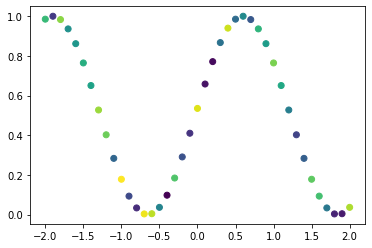

0.4417261042993865

In [110]:
df = pd.read_csv('Q5.csv')

from sklearn.utils import shuffle
# df = shuffle(df)

data_set = np.array(df.values)



Z = RBFNetRegressor(data_set[:,0].reshape(-1,1), data_set[:,1].reshape(-1,1) ,41 , 0.1)

A , _ = Z.k_means()

fig, ax = plt.subplots()

ax.scatter(data_set[:,0], data_set[:,1], c=A)
plt.show()



test.shape

Z.stds

In [111]:
def helper(Z):
  y_pred = []
  for i in range(data_set.shape[0]):

    n = Z.predict(data_set[i , 0])
    y_pred.append(n)

  fig, ax = plt.subplots()

  ax.scatter(data_set[:,0], data_set[:,1], c='red')
  ax.scatter(data_set[:,0], y_pred, c='green')
  plt.show() 

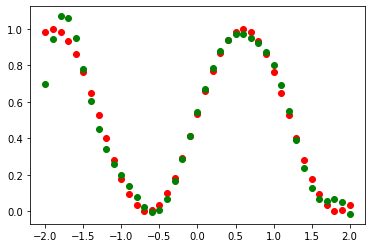

In [112]:
z0 = RBFNetRegressor(data_set[:,0].reshape(-1,1), data_set[:,1].reshape(-1,1) ,41 , 0.1 )
z0.training(50)
helper(z0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


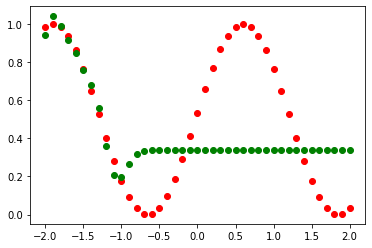

In [113]:
z1 = RBFNetRegressor(data_set[:,0].reshape(-1,1), data_set[:,1].reshape(-1,1) ,10 , 0.1 , centers=data_set[0:10,0].reshape(-1,1))
z1.training(50)
helper(z1)

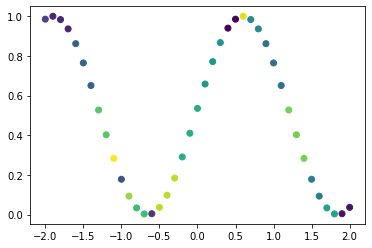

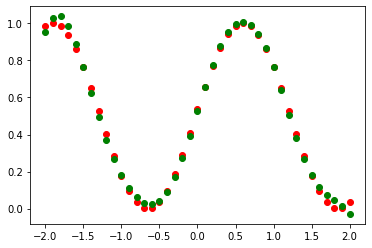

In [114]:
z2 = RBFNetRegressor(data_set[:,0].reshape(-1,1), data_set[:,1].reshape(-1,1) ,20 , 0.1 )
A , _ = z2.k_means()

fig, ax = plt.subplots()

ax.scatter(data_set[:,0], data_set[:,1], c=A)
plt.show()
z2.training(50)
helper(z2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


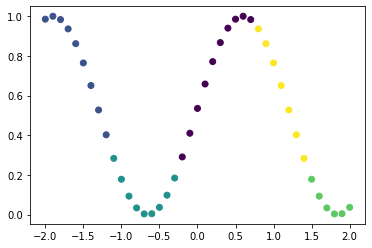

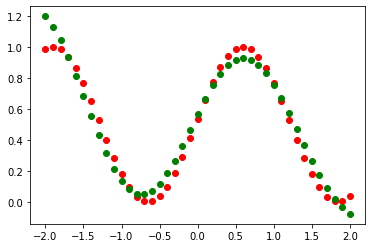

1.1384199576606175

In [115]:
z3 = RBFNetRegressor(data_set[:,0].reshape(-1,1), data_set[:,1].reshape(-1,1) ,5, 0.1, centers=data_set[::9,0].reshape(-1,1) )
A , _ = z3.k_means()

fig, ax = plt.subplots()

ax.scatter(data_set[:,0], data_set[:,1], c=A)
plt.show()
z3.training(50)
helper(z3)
z3.stds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


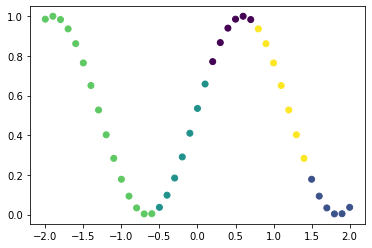

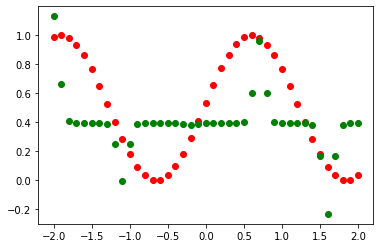

In [116]:
z4 = RBFNetRegressor(data_set[:,0].reshape(-1,1), data_set[:,1].reshape(-1,1) ,5, 0.1, centers=data_set[::9,0].reshape(-1,1) , stds=0.1)
A , _ = z4.k_means()

fig, ax = plt.subplots()

ax.scatter(data_set[:,0], data_set[:,1], c=A)
plt.show()
z4.training(50)
helper(z4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


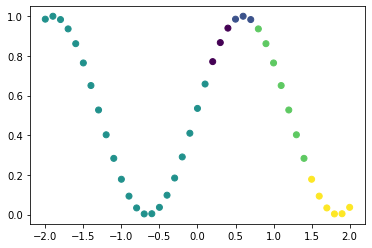

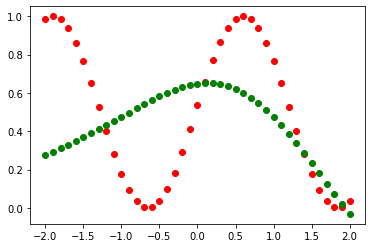

In [117]:
z5 = RBFNetRegressor(data_set[:,0].reshape(-1,1), data_set[:,1].reshape(-1,1) ,5, 0.1, centers=data_set[::9,0].reshape(-1,1) , stds=2)
A , _ = z5.k_means()

fig, ax = plt.subplots()

ax.scatter(data_set[:,0], data_set[:,1], c=A)
plt.show()
z5.training(50)
helper(z5)